## Handwritten Digit Classification using ANN (Minist Dataset)

### Set Up the Environment

In [17]:
pip install tensorflow numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


### Load and Preprocess the Data

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images (28x28 to 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


### Build the ANN Architecture

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Train the Model

In [20]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2699 - accuracy: 0.9208 - val_loss: 0.1443 - val_accuracy: 0.9546
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1149 - accuracy: 0.9654 - val_loss: 0.1144 - val_accuracy: 0.9649
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0778 - accuracy: 0.9752 - val_loss: 0.0954 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0562 - accuracy: 0.9822 - val_loss: 0.1147 - val_accuracy: 0.9666
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0955 - val_accuracy: 0.9728
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.1387 - val_accuracy: 0.9642
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0289 - accuracy: 0.9900 - val_loss: 0.1095 - val_accuracy:

### Evaluate the Model

In [21]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')


313/313 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9740
Test accuracy: 0.9740


### Make Predictions and Display Results

313/313 [==============================] - 1s 2ms/step


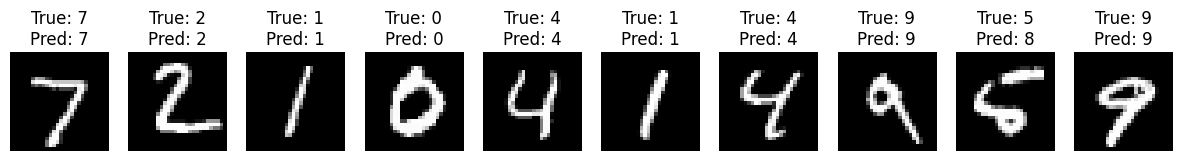

In [22]:
# Make predictions
predictions = model.predict(x_test)

# Display some test images with predicted and actual labels
def display_images(images, labels, predictions, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {np.argmax(labels[i])}\nPred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

# Display first 10 test images
display_images(x_test, y_test, predictions, num_images=10)


### Save the Model

In [23]:
# Save the model in HDF5 format
model.save('minist_ann_model.h5')

### Visualize Loss and Accuracy

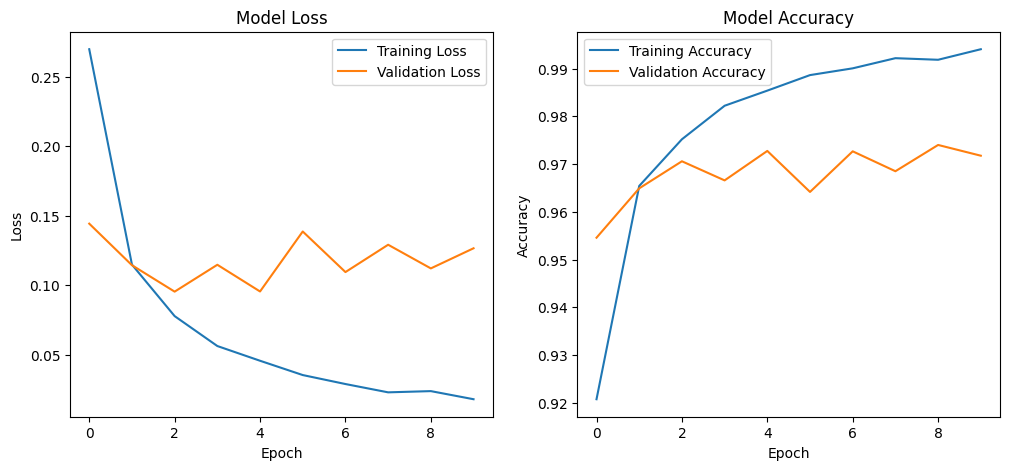

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

plt.show()
